# Lab3 - Activity 1 - Linear Model

### References:
#### 1. Lab3.pdf
#### 2. Read xlsx - https://cran.r-project.org/web/packages/xlsx/xlsx.pdf
#### 3. LM - https://stat.ethz.ch/R-manual/R-devel/library/stats/html/lm.html and lecture video
#### 4. abline - http://stackoverflow.com/questions/16140582/r-draw-abline-lm-line-of-best-fit-through-arbitrary-point and https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/abline.html
#### 5. Patrick Kane stats - https://www.nhl.com/player/patrick-kane-8474141
#### 6. P_val & R_sq : http://stackoverflow.com/questions/5587676/pull-out-p-values-and-r-squared-from-a-linear-regression

#### Load libraries and retrieve NHL Stats Table

In [2]:
library("readxl")
NHLTable  <- read_excel("NHLTop100.xlsx")

#### Select necessary columns

In [3]:
NHL <- subset(NHLTable, select=c("GP", "G","A"))
NHL

GP,G,A
1487,894,1963
1756,694,1193
1767,801,1049
1731,549,1249
1348,731,1040
1514,692,1063
915,690,1033
1391,681,1007
1378,625,1016
1282,717,873


#### Try Linear Modeling 

In [4]:
model <- lm(G~A,NHL)
summary(model)


Call:
lm(formula = G ~ A, data = NHL)

Residuals:
    Min      1Q  Median      3Q     Max 
-294.82  -83.50   10.12   88.54  284.69 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 321.08001   46.62860   6.886 5.52e-10 ***
A             0.20805    0.06033   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 130.9 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


### a. After the initial fitting, evaluate the fit by noting the R2 and p values of the fit.

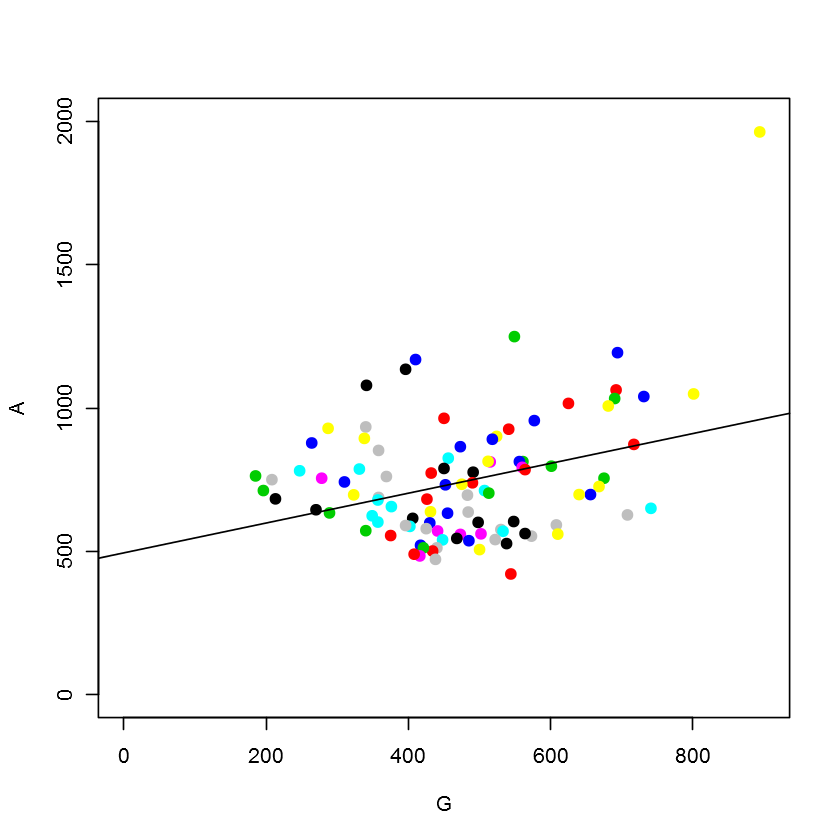

In [132]:
plot(A~G,NHL,col=GP,pch=19,ylim=c(0,2000),xlim=c(0,900))
abline(lm(A~G,data=NHL))

In [6]:
summary(model)
p_val_model <- summary(model)$coefficients[4]   ##P-values
r_sq_model <- summary(model)$r.squared         ##R squared values


Call:
lm(formula = G ~ A, data = NHL)

Residuals:
    Min      1Q  Median      3Q     Max 
-294.82  -83.50   10.12   88.54  284.69 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 321.08001   46.62860   6.886 5.52e-10 ***
A             0.20805    0.06033   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 130.9 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


### b. Passing Line through Wayne Gretzky

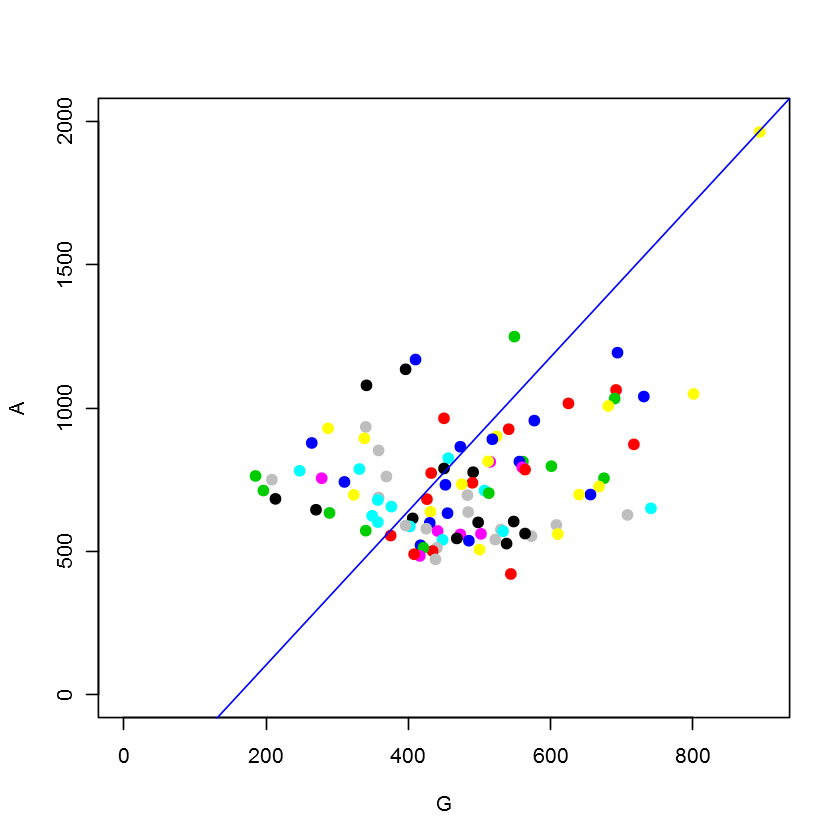

In [134]:
p = 894
q = 1963
plot(A~G,NHL,col=GP,pch=19,ylim=c(0,2000),xlim=c(0,900))
model_wayne <- (lm(I(A-q)~I(G-p) + 0, NHL))
#abline(predict(model_wayne, newdata = list(G=0))+1963, coef(model_wayne), col='red')
#OR
abline(b=coef(model_wayne),a=-433,col='blue')
#summary(model_wayne)

In [8]:
summary(model_wayne)
p_val_wayne <- summary(model_wayne)$coefficients[4]  
r_sq_wayne <- summary(model_wayne)$r.squared         


Call:
lm(formula = I(A - q) ~ I(G - p) + 0, data = NHL)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
I(G - p)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


#### Adding Patrick Kane Stats

In [127]:
kane_g = 283
kane_a = 459
kane_gp = 730
NHL_pk <- rbind(NHL, c(kane_gp,kane_g,kane_a))

### c. Passing Line through Patrick Kane


Call:
lm(formula = I(A - kane_a) ~ I(G - kane_g) + 0, data = NHL_pk)

Residuals:
    Min      1Q  Median      3Q     Max 
-338.04 -112.70   40.16  168.10  801.60 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
I(G - kane_g)  1.14959    0.09765   11.77   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.8 on 100 degrees of freedom
Multiple R-squared:  0.5809,	Adjusted R-squared:  0.5767 
F-statistic: 138.6 on 1 and 100 DF,  p-value: < 2.2e-16


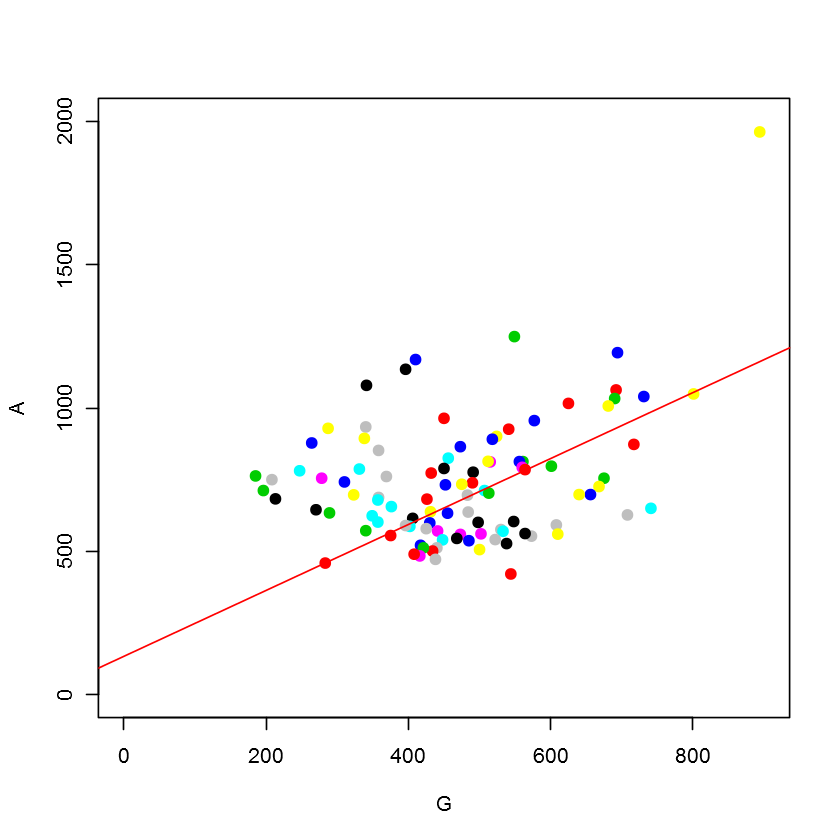

In [133]:
plot(A~G,NHL_pk,col=GP,pch=19,ylim=c(0,2000),xlim=c(0,900))
model_patrick <- (lm(I(A-kane_a)~I(G-kane_g) + 0, NHL_pk))
abline(predict(model_patrick, newdata = list(G=0))+kane_a, coef(model_patrick), col='red')
summary(model_patrick)
#abline(b=coef(model_patrick),a=,col='blue')

In [11]:
summary(model_patrick)
p_val_patrick <- summary(model_patrick)$coefficients[4]   ##P-values
r_sq_patrick <- summary(model_patrick)$r.squared         ##R squared values


Call:
lm(formula = I(A - kane_a) ~ I(G - kane_g) + 0, data = NHL_pk)

Residuals:
    Min      1Q  Median      3Q     Max 
-338.04 -112.70   40.16  168.10  801.60 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
I(G - kane_g)  1.14959    0.09765   11.77   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.8 on 100 degrees of freedom
Multiple R-squared:  0.5809,	Adjusted R-squared:  0.5767 
F-statistic: 138.6 on 1 and 100 DF,  p-value: < 2.2e-16


### d. Plotting Models through origin and Points

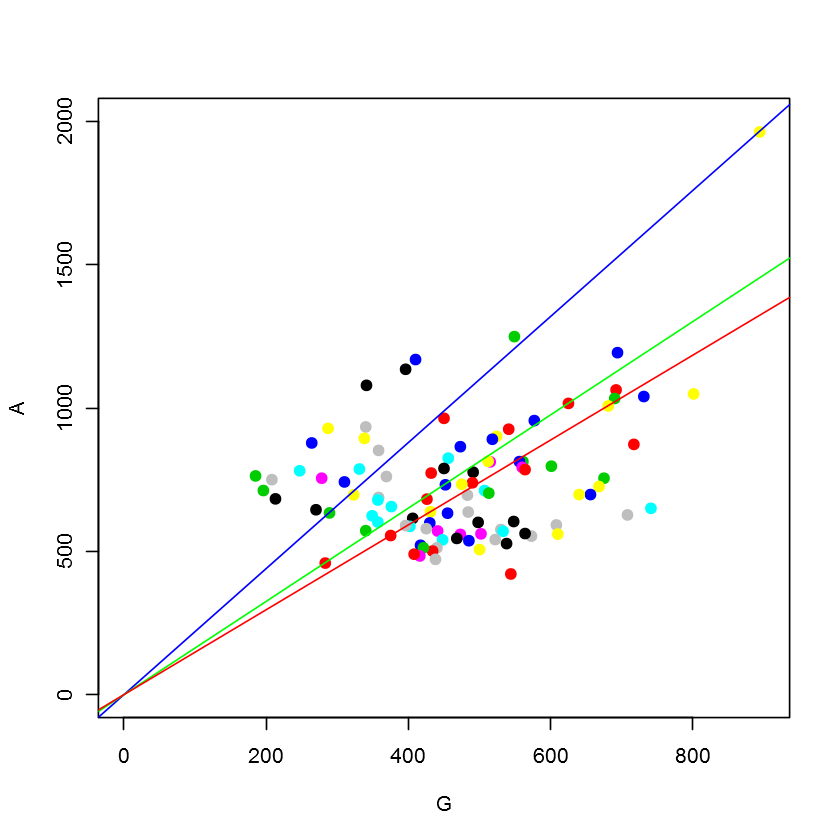

In [107]:
plot(A~G,NHL_pk,col=GP,pch=19,ylim=c(0,2000),xlim=c(0,900))
#abline(lm(I(A-q)~I(G-p) + 0,data = NHL),col="red")
model_initial <- (lm(I(A)~I(G) + 0, NHL))          #slope = 0.21(approx)
model_wayne_zero <- (lm(I(A-1963)~I(G-894),NHL))   #slope = 1963/894 = 2.19(approx)
model_patrick_zero <- (lm(I(A-459)~I(G-283),NHL_pk))   #slope = 459/283 = 1.62(approx)

# Define a new model with same slope as wayne and zero intercept (through trial and error) - and fit a line through that new model
# The above method gives us a new model which pass through wayne gretzky and origin both
# Repeat the same method for Patrick kane

model_zero_w <- lm(A+370~G+0,NHL)     #Same slope as Wayne Gretzky(Approx = 2.19)
#summary(model_zero)                  #New Model
abline(b=coef(model_zero_w),a=0,col='blue')   #Line through Wayne and Origin due to New Model
p_val_zero_w <- summary(model_zero_w)$coefficients[4]   ##P-values
r_sq_zero_w <- summary(model_zero_w)$r.squared         ##R squared values

model_zero_p <- lm(A+75~G+0,NHL_pk)    #Same slope as Patrick KAne(Approx = 1.62)
#summary(model_zero_p)               #New Model
abline(b=coef(model_zero_p),a=0,col='green')   #Line through Patrick and Origin due to New Model
p_val_zero_p <- summary(model_zero_p)$coefficients[4]   ##P-values
r_sq_zero_p <- summary(model_zero_p)$r.squared         ##R squared values

model_zero_i <-lm(A~G-1,data=NHL)    #Changing initial model so that it doesn't accept an argument for intercept (i.e. makes it pass through origin)
#summary(model_zero_i)               #New Model
abline(b=coef(model_zero_i),a=0,col='red')   #Line through Patrick and Origin due to New Model
p_val_zero_i <- summary(model_zero_i)$coefficients[4]   ##P-values
r_sq_zero_i <- summary(model_zero_i)$r.squared         ##R squared values

In [49]:
summary(model_origin)
p_val_origin <- summary(model_origin)$coefficients[4]   ##P-values
r_sq_origin <- summary(model_origin)$r.squared         ##R squared values


Call:
lm(formula = I(A) ~ I(G) + 0, data = NHL)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
I(G)  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16


### Create a Table to analyze R-squared and P-values

In [135]:
Serial_Number <- seq(1,6)
models<- c("Normal Model","Wayne Gretzky Model","Patrick Kane Model","Initial Model through Origin ","Wayne Gretzky Model through Origin","Patrick Kane Model through Origin")
r_sq <- c(r_sq_model,r_sq_wayne,r_sq_patrick,r_sq_zero_i,r_sq_zero_w,r_sq_zero_p)
p_val <- c(p_val_model,p_val_wayne,p_val_patrick,p_val_zero_i,p_val_zero_w,p_val_zero_p)
Table <- data.frame(Sr.No=Serial_Number,Models=models,R_Squared=r_sq,P_Values=p_val)


### Display Table

In [136]:
Table

Sr.No,Models,R_Squared,P_Values
1,Normal Model,0.1082305,6.032711e-02
2,Wayne Gretzky Model,0.9091456,2.298260e-53
3,Patrick Kane Model,0.5808792,1.357532e-20
4,Initial Model through Origin,0.8981861,6.490898e-51
5,Wayne Gretzky Model through Origin,0.9224517,8.995242e-57
6,Patrick Kane Model through Origin,0.9065492,2.824101e-53


#### Interpretation: 
1. Normal Model - Not a good model, as R_squared value is pretty low and P_Value is not that low as compared to other models.
2. Wayne Gretzky - The R_squared is a almost equal to 1 which is a good sign (good fit) and P_value is pretty low.
3. Patrick Kane - The R_squared is better than Normal Model however not as good as Wayne Gretzky Model which shows it is not the best model to consider, same for P_values.
4. Initial Model through Origin - Better model than the Normal Model as seen from the R_squared and P_values of both.
5. Wayne Gretzky Model through Origin - It is the best model among all as seen from the highest R_squared Value and the lowest P_values among all in the table, and thus can be deemed as the best model.
6. Patrick Kane Model through Origin - Better than the Normal Patrick Kane Model as seen from the significant increase in the R_squared and decrease in the P_values from the previous one.